In [1]:
import pandas as pd

### Feature Engineering

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Feature Engineering is a process of creating new features or tranforming your existing features to get the most out of your data.
   </font>
</p>

### Feature Creation

In [2]:
data_df = pd.read_csv(r"D:/Artificial_Intelligence/nat_lang_proc/data/SMSSpamCollection.tsv", delimiter="\t", header=None)
data_df.columns = ["labels", "body_text"]
data_df.head()

,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Feature creation requires us to think what new features might contribute to our model. Below are some example.<br>
       <b>Creating a feature using text message length:</b><br>
       We are going to work under hypothesis that sapm messages tend to be longer than real text messages.
   </font>
</p>


In [3]:
data_df["body_len"] = data_df["body_text"].apply(lambda x: len(x) - x.count(" "))
data_df.head()

,labels,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Creating feature for % of text that is punctuation:</b><br>
       We are going to work under hypothesis that real text messages use less punctuation than spam.
   </font>
</p>

In [4]:
import string
def puct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

data_df["puct %"] = data_df["body_text"].apply(puct_count)
data_df.head()

,labels,body_text,body_len,puct %
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Feature Evaluation

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       We are checking newly added features adding value or not to the models
   </font>
</p>

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [7]:
bins = np.linspace(0, 200, 40)
bins

array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
        20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
        41.02564103,  46.15384615,  51.28205128,  56.41025641,
        61.53846154,  66.66666667,  71.79487179,  76.92307692,
        82.05128205,  87.17948718,  92.30769231,  97.43589744,
       102.56410256, 107.69230769, 112.82051282, 117.94871795,
       123.07692308, 128.20512821, 133.33333333, 138.46153846,
       143.58974359, 148.71794872, 153.84615385, 158.97435897,
       164.1025641 , 169.23076923, 174.35897436, 179.48717949,
       184.61538462, 189.74358974, 194.87179487, 200.        ])

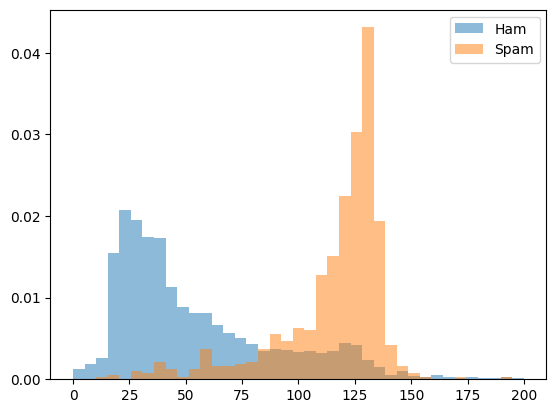

In [27]:
pyplot.hist(data_df[data_df["labels"]=="ham"]["body_len"], bins, alpha=0.5, label="Ham", density=True)
pyplot.hist(data_df[data_df["labels"]=="spam"]["body_len"], bins, alpha=0.5, label="Spam", density=True)
pyplot.legend(loc="upper right")
pyplot.show()

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       From the above graph we can conclude that most of the spam messages have more length than the ham messages. So we can say this feature contributing to our model.
   </font>
</p>

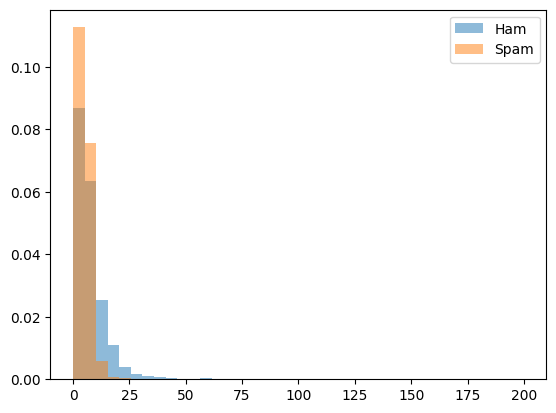

In [28]:
pyplot.hist(data_df[data_df["labels"]=="ham"]["puct %"], bins, alpha=0.5, label="Ham", density=True)
pyplot.hist(data_df[data_df["labels"]=="spam"]["puct %"], bins, alpha=0.5, label="Spam", density=True)
pyplot.legend(loc="upper right")
pyplot.show()

So, from above the graph we can conclude that punctuation percentage not contributing that much to our model.